### Precision and Recall
$$
Precision = \frac{TP}{(TP+FP)}
$$
$$
Recall = \frac{TP}{(TP+FN)}
$$

TP is the number of true positives, and FP is the number of false positives. A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one
positive instance. So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier. FN is of course the number of false negatives.

Suppose a picture has 12 dogs and 4 cats in it. A program identifies 8 dogs in it but in reality, there are only 5 dogs in those identified 8 dogs. 

This means that **Precision Score** will be 5/8. Precision implies how correct/useful our program is. 

Similarily **Recall Score** would be 5/12. Recall implies how complete our program is. 

### Type I and Type II Errors
In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis (also known as a "false positive" finding), while a type II error is failing to reject a false null hypothesis (also known as a "false negative" finding). More simply stated, a type I error is to falsely infer the existence of something that is not there, while a type II error is to falsely infer the absence of something that is.  


**Type I Error** is the number of false positives which in above case is (8-5) = 3 as program wrongly identified 3 cats as dogs.

**Type II Error** is the number of false negatives which in above case is (12-5) =  7 as program rejected 7 dogs because it thought they weren't dog but they actually were.  

### Sensitivity and Specificity

**Sensitivity** (also called TPR or Recall) measures the proportion of actual positives that are correctly identified as such. 

**Specificity** (also called True Negative Rate) measures the proportion of actual negatives that are correctly identified as such.
$$
Sensitivity = \frac{TP}{TP+FN}
$$

$$
Specificity = \frac{TN}{TN+FP}
$$

Note that **Sensitivity equals to Recall.** 
<img src="images/sensitivity.png" width="300" height="500"/>

**Sensitivity** will be 5/12 as it equals to **Recall**

**Specificity** will be 1/(1+3) = 1/4

![](images/precision.png)

The above image is an illustration of the case where our estimator tries to identify digit  '5' among hand written digits smaples. 

### F-1 Score

$$F1 = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

To compute the F1 score, simply call the f1_score() function:
```python
>>> from sklearn.metrics import f1_score
>>> f1_score(y_train_5, y_pred)
0.78468208092485547
```

### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. **Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.**

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the `roc_curve()` function:

```python
>>>from sklearn.metrics import roc_curve
>>>fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
```

![](images/roc.png)

See [SVM - ROC Example](ML - Support Vector Machines.ipynb#ROC-Example) for a concrete example of ROC curve

#### ROC - A Basic Example

In [2]:
from sklearn.metrics import roc_curve, auc

ytrue = [1,1,1,1,0,1,0,0]
ypred = [.9,.8,.9,.4,.2,.9,.3,.8]

fpr,tpr, thres = roc_curve(ytrue, ypred, drop_intermediate = False)

Though the length of `ytrue` is 8, the length of `fpr` and `tpr` is 5. This is because the values in `thres` array are the unique values found in `ypred` (that is 5). Try chaging the values in `ypred` and see what happens.

Also, in `roc_curve` function, the default value of `drop_intermediate` is set to `True`. This makes some suboptimal values of `thres` to be ignored. 

ypred is the output of decision function (either `decision_function` or `predict_proba`, depending on the classifier)

In [3]:
fpr

array([ 0.        ,  0.33333333,  0.33333333,  0.66666667,  1.        ])

In [4]:
tpr

array([ 0.6,  0.8,  1. ,  1. ,  1. ])

In [5]:
thres

array([ 0.9,  0.8,  0.4,  0.3,  0.2])

For each threshold value, we compare each value in `ypred` with threshold value, if it is >= threshold value, we replace it with 1, otherwise it is replaced with 0. Then we calculate `fp`, `tp`, `fpr`, `tpr` by comparing new `ypred` to `ytrue`. 

$tpr = \frac{TP}{(TP+FN)} = Recall = Sensitivity$

$fpr = \frac{FP}{(FP+TN)} = 1 - \frac{TN}{FP+TN} = 1 - Specificity$

See below for illustration- 

In [6]:
# thres = .9
ytrue = [1,1,1,1,0,1,0,0]
ypred = [1,0,1,0,0,1,0,0]
true_positive = 3
false_positive = 0
tpr_9 = 3/5  # 5 is the number of positive instances in ytrue
fpr_9 = 0/3  # 3 is the number of negative instances in ytrue
tpr_9, fpr_9

(0.6, 0.0)

In [7]:
# thres = .8
ypred = [1,1,1,0,0,1,0,1]
true_positive = 4
false_positive = 1
tpr_8 = 4/5  # 5 is the number of positive instances in ytrue
fpr_8 = 1/3  # 3 is the number of negative instances in ytrue
tpr_8, fpr_8

(0.8, 0.3333333333333333)

Similarily we can go on for other threshold values. For above two cases of threshold, our results are matching with the values calculated by `roc_curve` function.

Let us generate `ypred` lists based on each value of thres. 

In [8]:
ypred = [.9,.8,.9,.4,.2,.9,.3,.8]


for i in thres:
    ypred_t = []
    for j in ypred:
        if j >= i:
            ypred_t.append(1)
        else:
            ypred_t.append(0)
    print("for thres value %.1f ypred is" %i, ypred_t)  

for thres value 0.9 ypred is [1, 0, 1, 0, 0, 1, 0, 0]
for thres value 0.8 ypred is [1, 1, 1, 0, 0, 1, 0, 1]
for thres value 0.4 ypred is [1, 1, 1, 1, 0, 1, 0, 1]
for thres value 0.3 ypred is [1, 1, 1, 1, 0, 1, 1, 1]
for thres value 0.2 ypred is [1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
#calculate false positive and true positive for each threshold.
#don't confuse false positive with fpr. Ditto for true positive
#fpr = fp/total negative in ytrue =(1-specificity)  and tpr = tp/total positives in ytrue (sensitivity)

ypred = [.9,.8,.9,.4,.2,.9,.3,.8]
ytrue = [1,1,1,1,0,1,0,0]

for i in thres:
    ypred_t = []
    fp, tp = (0,0)
    for j in ypred:
        if j >= i:
            ypred_t.append(1)
        else:
            ypred_t.append(0)
    #print(ypred_t)        
    for k in range(len(ypred)):
        if ytrue[k] - ypred_t[k] == -1:
            fp+=1
        elif ytrue[k] - ypred_t[k] == 0 and ytrue[k] ==1:
            tp+=1
    print("for thres %.1f, fp is %d and tp is %d" %(i, fp, tp))    

for thres 0.9, fp is 0 and tp is 3
for thres 0.8, fp is 1 and tp is 4
for thres 0.4, fp is 1 and tp is 5
for thres 0.3, fp is 2 and tp is 5
for thres 0.2, fp is 3 and tp is 5


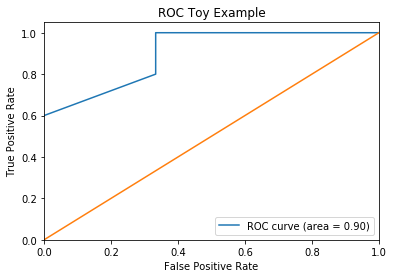

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr,label = 'ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Toy Example')
plt.legend(loc="lower right")

In [11]:
auc(fpr, tpr)

0.90000000000000002

### ROC Example

See Section 4.18.11 of docs(.19.1)

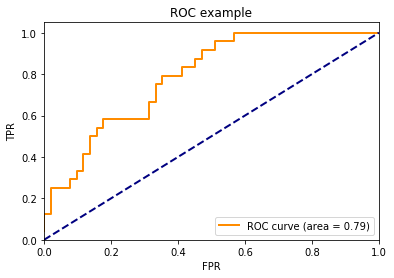

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle         
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp             

iris = datasets.load_iris()
X = iris.data
y = iris.target
#y = array([0, 0, 0,  2, 2])      

#binarize the output
y = label_binarize(y, classes = [0, 1, 2])
#y = array([[1, 0, 0],[1, 0, 0],[1, 0, 0],[1, 0, 0],..... [0, 0, 1],[0, 0, 1],[0, 0, 1],[0, 0, 1]], dtype=int32)
n_classes = y.shape[1]
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200*n_features)]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .5, random_state = 0)

classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear', probability = True, random_state = random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0,1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()


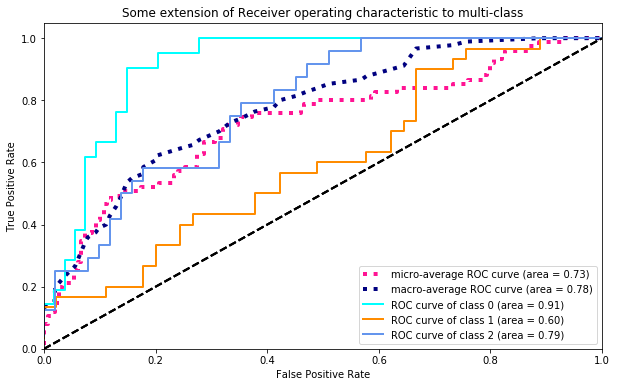

In [16]:
#Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure(figsize =(10,6))
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [17]:
fpr

{0: array([ 0.        ,  0.        ,  0.01851852,  0.01851852,  0.03703704,
         0.03703704,  0.05555556,  0.05555556,  0.07407407,  0.07407407,
         0.09259259,  0.09259259,  0.12962963,  0.12962963,  0.14814815,
         0.14814815,  0.2037037 ,  0.2037037 ,  0.27777778,  0.27777778,  1.        ]),
 1: array([ 0.        ,  0.        ,  0.02222222,  0.02222222,  0.11111111,
         0.11111111,  0.17777778,  0.17777778,  0.2       ,  0.2       ,
         0.24444444,  0.24444444,  0.26666667,  0.26666667,  0.37777778,
         0.37777778,  0.42222222,  0.42222222,  0.48888889,  0.48888889,
         0.57777778,  0.57777778,  0.62222222,  0.62222222,  0.64444444,
         0.64444444,  0.66666667,  0.66666667,  0.73333333,  0.73333333,
         0.75555556,  0.75555556,  0.88888889,  0.88888889,  1.        ]),
 2: array([ 0.        ,  0.        ,  0.01960784,  0.01960784,  0.07843137,
         0.07843137,  0.09803922,  0.09803922,  0.11764706,  0.11764706,
         0.1372549 ,  0.1